## Diabetes mellitus, commonly known as diabetes, is a metabolic disease that causes high blood sugar. The hormone insulin moves sugar from the blood into your cells to be stored or used for energy. With diabetes, your body either doesn't make enough insulin or can't effectively use the insulin it does make

![](https://images.squarespace-cdn.com/content/v1/53e3bacbe4b022bcdbe1f538/1504716606889-SRWLJ8EH744M4IHRX3LQ/ke17ZwdGBToddI8pDm48kDrMjE7hBq4fQV3wYHraitJZw-zPPgdn4jUwVcJE1ZvWQUxwkmyExglNqGp0IvTJZUJFbgE-7XRK3dMEBRBhUpzj2bmKhA1a89vhGCTEuFcMrGIAhTIwGn2DOXg1A8iNSPxvh_zK_LmuDa3ZMbEzfBk/Diabetes-is-a-Drag.gif)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm

# Get feel of data

In [3]:
df=pd.read_csv('/kaggle/input/pima-indians-diabetes-database/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52e4c9bd0>,
      dtype=object)

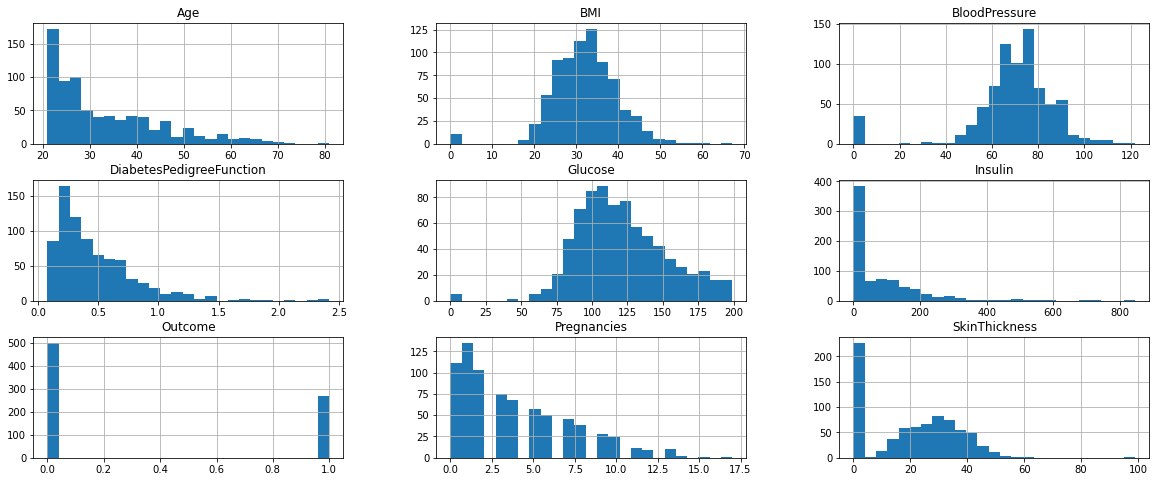

In [5]:
# Distribution of our data
df.hist(bins=25,figsize=(20,8))

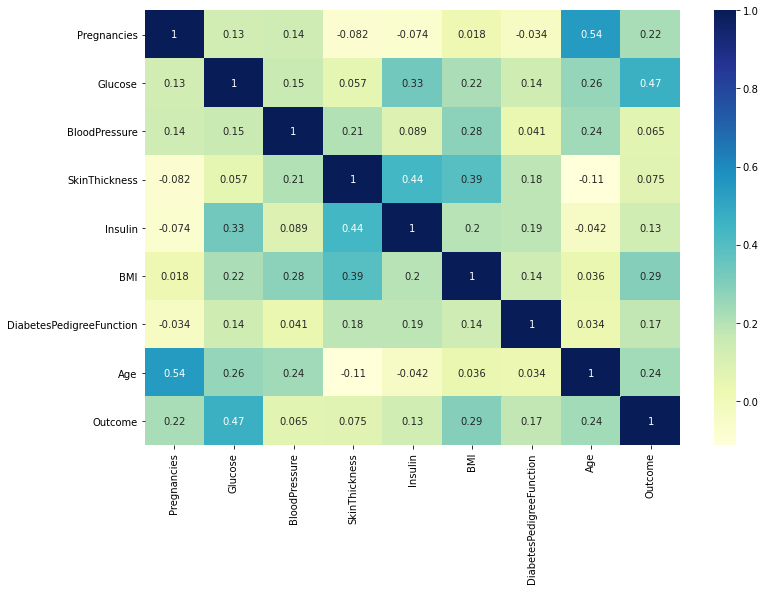

In [6]:
# Correlation 
corr=df.corr()
f,ax=plt.subplots(1,1,figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="YlGnBu", ax=ax)

1:- Diabetes....|||||....0:- healthy


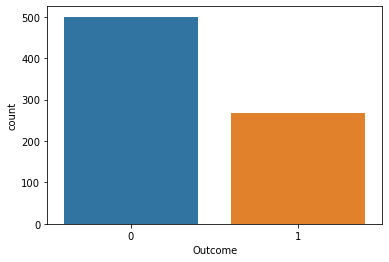

In [7]:
ax=sns.countplot('Outcome', data=df)
print('1:- Diabetes....|||||....0:- healthy')

# Removing outliers !
### In above Distribution graph we can notice outliers in :
* **BMI**  

A BMI of less than 18.5 means that a person is underweight. A BMI of between 18.5 and 24.9 is ideal. A BMI of between 25 and 29.9 is overweight. A BMI over 30 indicates obesity.
<hr>

* **Blood Pressure**

As a general guide: ideal blood pressure is considered to be between 90/60mmHg and 120/80mmHg. high blood pressure is considered to be 140/90mmHg or higher. low blood pressure is considered to be 90/60mmHg or lower.

<hr>

* **Glucose**

For the majority of healthy individuals, normal blood sugar levels are as follows: Between 4.0 to 5.4 mmol/L (72 to 99 mg/dL) when fasting. Up to 7.8 mmol/L (140 mg/dL) 2 hours after eating.

<hr>

* **SkinThickness**

For adults, the standard normal values for triceps skinfolds are (see TableH): 2.5mm (men) or about 20% fat; 18.0mm (women) or about 30% fat

In [8]:
df=df.loc[(df.BMI>10) & (df.BloodPressure>20) & (df.Glucose>25)]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd52d1ca950>,
      dtype=object)

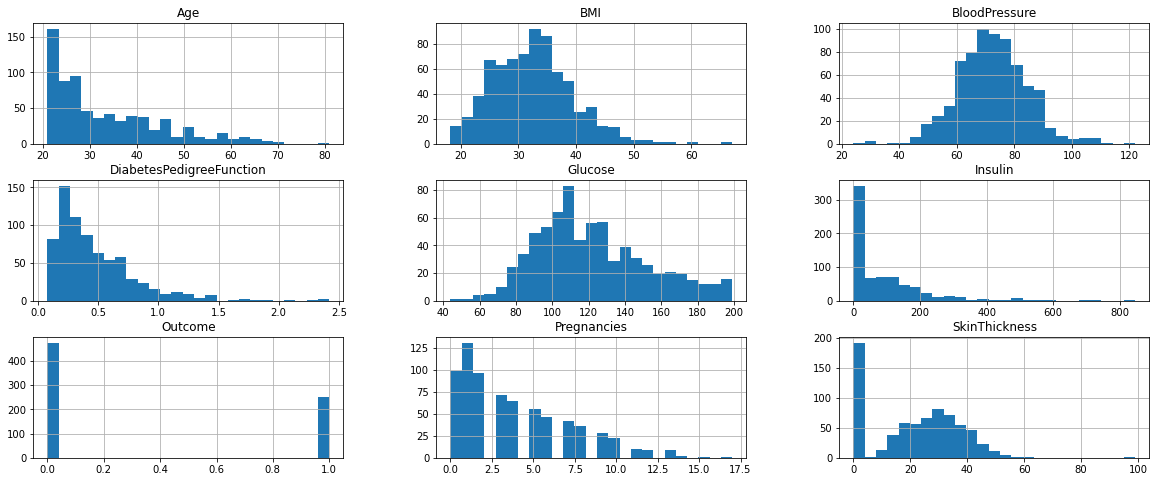

In [9]:
# Distribution of our data
df.hist(bins=25,figsize=(20,8))

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 724 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               724 non-null    int64  
 1   Glucose                   724 non-null    int64  
 2   BloodPressure             724 non-null    int64  
 3   SkinThickness             724 non-null    int64  
 4   Insulin                   724 non-null    int64  
 5   BMI                       724 non-null    float64
 6   DiabetesPedigreeFunction  724 non-null    float64
 7   Age                       724 non-null    int64  
 8   Outcome                   724 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 56.6 KB


In [12]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000,724.000000
mean,3.866022,121.882597,72.400552,21.443370,84.494475,32.467127,0.474765,33.350829,0.343923
std,3.362803,30.750030,12.379870,15.732756,117.016513,6.888941,0.332315,11.765393,0.475344
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,48.000000,32.400000,0.379000,29.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,130.500000,36.600000,0.627500,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


> **These are missing values replaced with zeros. Take a look at section 3.7 of this paper:**
https://www.sciencedirect.com/science/article/pii/S2352914816300016

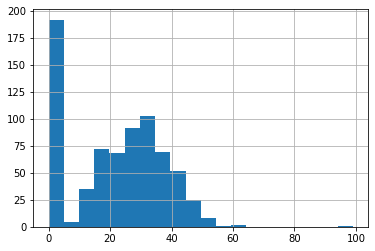

In [13]:
df.SkinThickness.hist(bins=20)

In [10]:
df.loc[(df.SkinThickness<5)& (df.Outcome==0), 'SkinThickness']=int(df[(df.Outcome==0)]['SkinThickness'].median())
df.loc[(df.SkinThickness<5)& (df.Outcome==1), 'SkinThickness']=int(df[(df.Outcome==1)]['SkinThickness'].median())

In [11]:
df.loc[(df.Insulin==0)& (df.Outcome==0), 'Insulin']=int(df[(df.Outcome==0)]['Insulin'].median())
df.loc[(df.Insulin==0)& (df.Outcome==1), 'Insulin']=int(df[(df.Outcome==1)]['Insulin'].median())

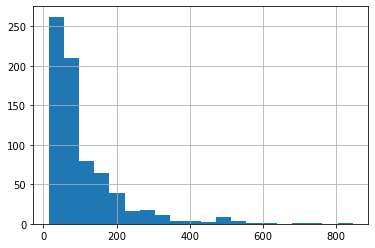

In [12]:
df.Insulin.hist(bins=20)

In [17]:
df.sample(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
395,2,127,58,24,275,27.7,1.600,25,0
633,1,128,82,17,183,27.5,0.115,22,0
764,2,122,70,27,46,36.8,0.340,27,0
744,13,153,88,37,140,40.6,1.174,39,0
398,3,82,70,22,46,21.1,0.389,25,0
720,4,83,86,19,46,29.3,0.317,34,0


# When Should You Use Normalization And Standardization:

* **Normalization** is a good technique to use when you do not know the distribution of your data or when you know the distribution is not Gaussian (a bell curve). Normalization is useful when your data has varying scales and the algorithm you are using does not make assumptions about the distribution of your data, such as k-nearest neighbors and artificial neural networks.

* **Standardization** assumes that your data has a Gaussian (bell curve) distribution. This does not strictly have to be true, but the technique is more effective if your attribute distribution is Gaussian. Standardization is useful when your data has varying scales and the algorithm you are using does make assumptions about your data having a Gaussian distribution, such as linear regression, logistic regression, and linear discriminant analysis.

In [13]:
scaler = StandardScaler()
data_x=scaler.fit_transform(df.drop(['Outcome'], axis=1))
#data_x=df.drop(['Outcome'], axis=1)

In [14]:
data_y=df.Outcome.values
#data_y=data_y.reshape((-1,1))

In [15]:
data_x.shape,data_y.shape

((724, 8), (724,))

# PCA 

In [16]:
from sklearn.decomposition import PCA

In [129]:
xtrain,xtest,ytrain,ytest=train_test_split(data_x,data_y,random_state=998)
xtrain.shape, xtest.shape

((543, 8), (181, 8))

> **Must fit pca with only training set. For gaining insights how it performs on real data**

In [130]:
pca=PCA(n_components=2)
pca.fit(xtrain)

PCA(n_components=2)

In [131]:
pca_xtrain=pca.transform(xtrain)
pca_xtest=pca.transform(xtest)
pca_xtrain.shape, pca_xtest.shape

((543, 2), (181, 2))

> Plot our 2D-data

In [132]:
def plot_2d(x_train,y_train,x_test,y_test):
    plt.figure(figsize=(16,8))
    sns.scatterplot(x=x_train[:,0], y=x_train[:,1], hue=y_train, marker = 'v', alpha=0.9,)
    sns.scatterplot(x=x_test[:,0], y=x_test[:,1], hue=y_test, alpha=0.8,  marker = 'o')
    

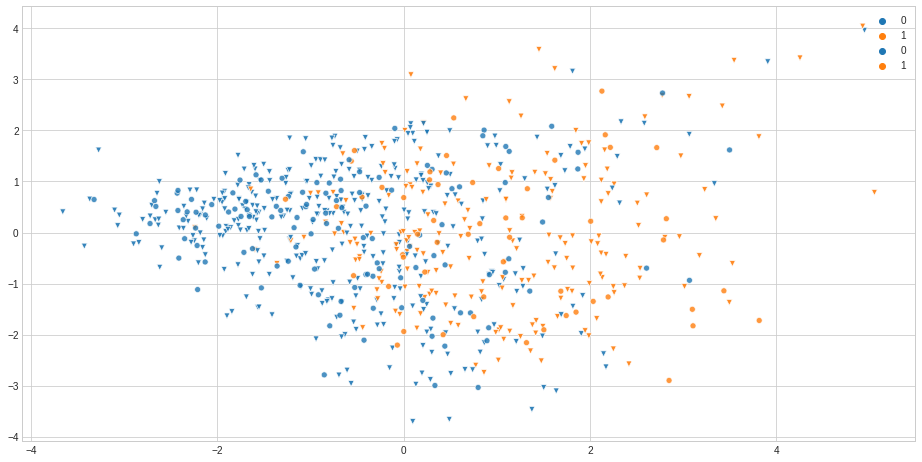

In [133]:
plot_2d(pca_xtrain,ytrain, pca_xtest, ytest)

# Machine learning Algo...


In [18]:
# imports we need............
from sklearn.model_selection import cross_val_score, ShuffleSplit, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import  GridSearchCV

In [ ]:
def find_best_model(x,y):
    params={
        'lin_reg':{
            'model': LinearRegression(),
            'para' :{
                'normalize':[True,False]
            }
        },
        'rand_reg':{
            'model': RandomForestRegressor(),
            'para':{
                'n_estimators':[5,8,9,15],
                'max_depth':[1,2,3,4]
            }
        }
        
    }
    score=[]
    cv=ShuffleSplit(n_splits=5,test_size=.2)
    for nam,config in params.items():
        gs=GridSearchCV(config['model'],config['para'],cv=cv,return_train_score=False)
        gs.fit(x,y)
        score.append({
            'model':nam,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        print(gs.best_score_)
    
    
    return pd.DataFrame(score)

## LogisticRegression

In [49]:
def fit(model, cv):
    return cross_val_score(model,data_x, data_y, cv=cv).mean()

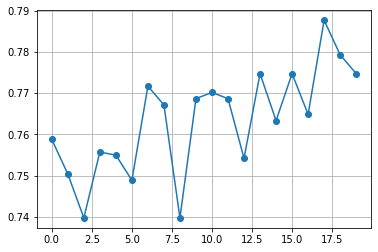

In [50]:
cv = ShuffleSplit(n_splits=10, test_size=0.18)
acc=[]
for i in range(1,21):
    log_clf=LogisticRegression(C=i)
    acc.append(fit(log_clf,cv))
plt.grid(True)
plt.plot(acc ,marker='o')

100%|██████████| 75/75 [00:08<00:00,  9.30it/s]


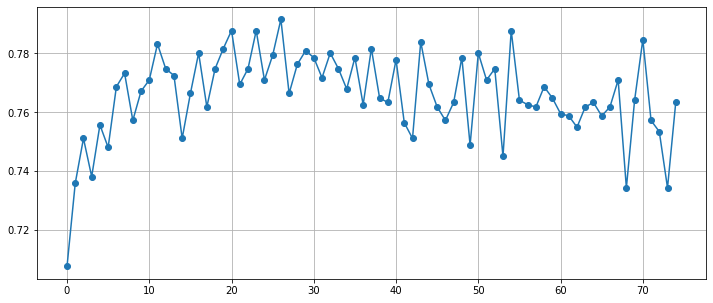

In [24]:
cv = ShuffleSplit(n_splits=10, test_size=0.18)
acc=[]
for i in tqdm(range(1,76)):
    log_clf=KNeighborsClassifier(n_neighbors=i)
    acc.append(fit(log_clf,cv))
plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(acc ,marker='o')

100%|██████████| 59/59 [00:13<00:00,  4.32it/s]


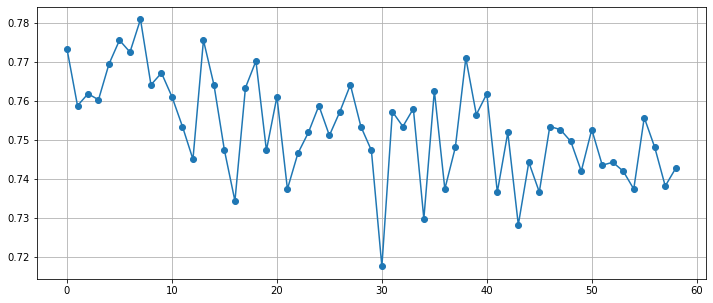

In [25]:
cv = ShuffleSplit(n_splits=10, test_size=0.18)
acc=[]
for i in tqdm(range(1,60)):
    log_clf=SVC(C=i)
    acc.append(fit(log_clf,cv))

plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(acc ,marker='o')

100%|██████████| 151/151 [05:07<00:00,  2.04s/it]


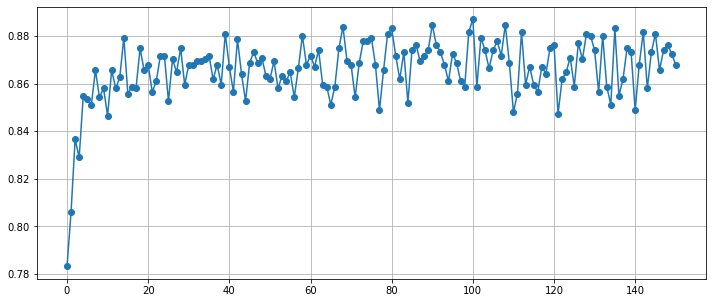

In [26]:
cv = ShuffleSplit(n_splits=10, test_size=0.18)
acc=[]
dict_={}
for i in tqdm(range(1,152)):
    log_clf=RandomForestClassifier(n_estimators=i)
    Accuracy=fit(log_clf,cv)
    acc.append(Accuracy)
    dict_[i]=Accuracy

plt.figure(figsize=(12,5))
plt.grid(True)
plt.plot(acc ,marker='o')

In [27]:
sorted(dict_.items(), key=lambda x: x[1], reverse=True)[:6]

[(101, 0.8870229007633588),
 (91, 0.8847328244274809),
 (109, 0.8847328244274809),
 (69, 0.883969465648855),
 (81, 0.8832061068702289),
 (136, 0.8832061068702289)]

In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve, classification_report
xtrain,xtest,ytrain,ytest=train_test_split(data_x,data_y,random_state=998)

In [44]:
rand_clf=RandomForestClassifier(n_estimators=101)
rand_clf.fit(xtrain,ytrain)

RandomForestClassifier(n_estimators=101)

In [45]:
print(confusion_matrix(ytest, rand_clf.predict(xtest)))
print('Accuracy of our model is: ', accuracy_score(ytest, rand_clf.predict(xtest)))

[[115  12]
 [  9  45]]
Accuracy of our model is:  0.8839779005524862


In [46]:
print(classification_report(ytest, rand_clf.predict(xtest)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       127
           1       0.79      0.83      0.81        54

    accuracy                           0.88       181
   macro avg       0.86      0.87      0.86       181
weighted avg       0.89      0.88      0.88       181



# Save our model

In [52]:
rand_clf=RandomForestClassifier(n_estimators=91)
cross_val_score(rand_clf,data_x, data_y, cv=cv).mean()

0.8702290076335879

In [53]:
%cd /kaggle/working

/kaggle/working


In [54]:
import pickle
Pkl_Filename = "Pima_final.pkl"  

In [55]:
with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(rand_clf, file)

# Ann

In [105]:
xtrain,xtest,ytrain,ytest=train_test_split(data_x,data_y,random_state=998)

In [106]:
ytrain.sum(),len(ytrain),ytest.sum(),len(ytest)

(195, 543, 54, 181)

In [107]:
ytest=ytest.reshape(-1,1)
ytrain=ytrain.reshape(-1,1)

In [108]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.regularizers import l1_l2

In [109]:
check_point=tf.keras.callbacks.ModelCheckpoint(
    filepath='diabetes.h5', monitor='val_loss', verbose=1, save_best_only=True,
    save_weights_only=False, mode='min')

In [120]:
model=Sequential([
    Dense(80,activation='relu',input_shape=(None,8)),
    Dropout(0.5),
    Dense(120,activation='relu', kernel_regularizer=l1_l2()),
    Dropout(0.5),
    Dense(128,activation='relu'),
    Dropout(0.5),
    Dense(60,activation='relu'),
    Dropout(0.5),
    Dense(30,activation='relu'),
    Dense(1,activation='sigmoid')
])

model.compile(loss='BinaryCrossentropy', optimizer=tf.keras.optimizers.Adam(0.001), metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, None, 80)          720       
_________________________________________________________________
dropout_8 (Dropout)          (None, None, 80)          0         
_________________________________________________________________
dense_13 (Dense)             (None, None, 120)         9720      
_________________________________________________________________
dropout_9 (Dropout)          (None, None, 120)         0         
_________________________________________________________________
dense_14 (Dense)             (None, None, 128)         15488     
_________________________________________________________________
dropout_10 (Dropout)         (None, None, 128)         0         
_________________________________________________________________
dense_15 (Dense)             (None, None, 60)         

In [121]:
history=model.fit(xtrain,ytrain,epochs=300,validation_data=(xtest,ytest), callbacks=[check_point])

Epoch 1/300
 1/17 [>.............................] - ETA: 0s - loss: 10.0912 - accuracy: 0.4688
Epoch 00001: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 10ms/step - loss: 9.1858 - accuracy: 0.5064 - val_loss: 8.2372 - val_accuracy: 0.7017
Epoch 2/300
 1/17 [>.............................] - ETA: 0s - loss: 8.2536 - accuracy: 0.5625
Epoch 00002: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 7.5328 - accuracy: 0.6280 - val_loss: 6.7080 - val_accuracy: 0.7017
Epoch 3/300
 1/17 [>.............................] - ETA: 0s - loss: 6.7317 - accuracy: 0.5938
Epoch 00003: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 6.0811 - accuracy: 0.6501 - val_loss: 5.3539 - val_accuracy: 0.7017
Epoch 4/300
 1/17 [>.............................] - ETA: 0s - loss: 5.3808 - accuracy: 0.5938
Epoch 00004: val_loss did not improve from 0.49707
17/17 [====================

Epoch 31/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5377 - accuracy: 0.8438
Epoch 00031: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.7772 - val_loss: 0.5639 - val_accuracy: 0.7514
Epoch 32/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5678 - accuracy: 0.7812
Epoch 00032: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5966 - accuracy: 0.7698 - val_loss: 0.5638 - val_accuracy: 0.7569
Epoch 33/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5165 - accuracy: 0.8125
Epoch 00033: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5811 - accuracy: 0.7772 - val_loss: 0.5512 - val_accuracy: 0.7680
Epoch 34/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4777 - accuracy: 0.9062
Epoch 00034: val_loss did not improve from 0.49707
17/17 [==================

Epoch 61/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4471 - accuracy: 0.8750
Epoch 00061: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5061 - accuracy: 0.8140 - val_loss: 0.5411 - val_accuracy: 0.7514
Epoch 62/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5054 - accuracy: 0.7812
Epoch 00062: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5376 - accuracy: 0.8011 - val_loss: 0.5217 - val_accuracy: 0.7956
Epoch 63/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5899 - accuracy: 0.6562
Epoch 00063: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5404 - accuracy: 0.7790 - val_loss: 0.5393 - val_accuracy: 0.7680
Epoch 64/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5303 - accuracy: 0.8125
Epoch 00064: val_loss did not improve from 0.49707
17/17 [==================

Epoch 91/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4939 - accuracy: 0.8438
Epoch 00091: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5077 - accuracy: 0.8085 - val_loss: 0.5290 - val_accuracy: 0.7624
Epoch 92/300
 1/17 [>.............................] - ETA: 0s - loss: 0.8568 - accuracy: 0.6562
Epoch 00092: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5383 - accuracy: 0.8122 - val_loss: 0.5139 - val_accuracy: 0.7901
Epoch 93/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5420 - accuracy: 0.8438
Epoch 00093: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5239 - accuracy: 0.8306 - val_loss: 0.5506 - val_accuracy: 0.7514
Epoch 94/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4810 - accuracy: 0.8438
Epoch 00094: val_loss did not improve from 0.49707
17/17 [==================

Epoch 121/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5584 - accuracy: 0.7812
Epoch 00121: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.5017 - accuracy: 0.8158 - val_loss: 0.5120 - val_accuracy: 0.7845
Epoch 122/300
 1/17 [>.............................] - ETA: 0s - loss: 0.3163 - accuracy: 0.9375
Epoch 00122: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4836 - accuracy: 0.8361 - val_loss: 0.5363 - val_accuracy: 0.7680
Epoch 123/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5219 - accuracy: 0.8750
Epoch 00123: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4972 - accuracy: 0.8379 - val_loss: 0.5243 - val_accuracy: 0.7735
Epoch 124/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4473 - accuracy: 0.8438
Epoch 00124: val_loss did not improve from 0.49707
17/17 [==============

Epoch 151/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4552 - accuracy: 0.8438
Epoch 00151: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4712 - accuracy: 0.8508 - val_loss: 0.5132 - val_accuracy: 0.7735
Epoch 152/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5701 - accuracy: 0.7812
Epoch 00152: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4805 - accuracy: 0.8453 - val_loss: 0.4994 - val_accuracy: 0.8066
Epoch 153/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4700 - accuracy: 0.8438
Epoch 00153: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4815 - accuracy: 0.8343 - val_loss: 0.5129 - val_accuracy: 0.7956
Epoch 154/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5631 - accuracy: 0.7812
Epoch 00154: val_loss did not improve from 0.49707
17/17 [==============

Epoch 181/300
 1/17 [>.............................] - ETA: 0s - loss: 0.3436 - accuracy: 0.9062
Epoch 00181: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4789 - accuracy: 0.8471 - val_loss: 0.5337 - val_accuracy: 0.7845
Epoch 182/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4450 - accuracy: 0.8750
Epoch 00182: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4699 - accuracy: 0.8527 - val_loss: 0.5322 - val_accuracy: 0.7790
Epoch 183/300
 1/17 [>.............................] - ETA: 0s - loss: 0.2584 - accuracy: 1.0000
Epoch 00183: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4688 - accuracy: 0.8490 - val_loss: 0.5224 - val_accuracy: 0.7901
Epoch 184/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4769 - accuracy: 0.8125
Epoch 00184: val_loss did not improve from 0.49707
17/17 [==============

Epoch 211/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5260 - accuracy: 0.8750
Epoch 00211: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4756 - accuracy: 0.8324 - val_loss: 0.5305 - val_accuracy: 0.7735
Epoch 212/300
 1/17 [>.............................] - ETA: 0s - loss: 0.3717 - accuracy: 0.9062
Epoch 00212: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4659 - accuracy: 0.8471 - val_loss: 0.5232 - val_accuracy: 0.7845
Epoch 213/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4886 - accuracy: 0.8438
Epoch 00213: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4582 - accuracy: 0.8508 - val_loss: 0.5275 - val_accuracy: 0.7735
Epoch 214/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4901 - accuracy: 0.8438
Epoch 00214: val_loss did not improve from 0.49707
17/17 [==============

Epoch 241/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5069 - accuracy: 0.7812
Epoch 00241: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4573 - accuracy: 0.8490 - val_loss: 0.5305 - val_accuracy: 0.7901
Epoch 242/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4543 - accuracy: 0.8750
Epoch 00242: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4343 - accuracy: 0.8600 - val_loss: 0.5295 - val_accuracy: 0.7956
Epoch 243/300
 1/17 [>.............................] - ETA: 0s - loss: 0.3477 - accuracy: 0.9062
Epoch 00243: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4244 - accuracy: 0.8674 - val_loss: 0.5370 - val_accuracy: 0.8066
Epoch 244/300
 1/17 [>.............................] - ETA: 0s - loss: 0.7337 - accuracy: 0.7812
Epoch 00244: val_loss did not improve from 0.49707
17/17 [==============

Epoch 271/300
 1/17 [>.............................] - ETA: 0s - loss: 0.6324 - accuracy: 0.7188
Epoch 00271: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4360 - accuracy: 0.8711 - val_loss: 0.5039 - val_accuracy: 0.8066
Epoch 272/300
 1/17 [>.............................] - ETA: 0s - loss: 0.5200 - accuracy: 0.7812
Epoch 00272: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4214 - accuracy: 0.8674 - val_loss: 0.5088 - val_accuracy: 0.8122
Epoch 273/300
 1/17 [>.............................] - ETA: 0s - loss: 0.4210 - accuracy: 0.8438
Epoch 00273: val_loss did not improve from 0.49707
17/17 [==============================] - 0s 4ms/step - loss: 0.4355 - accuracy: 0.8637 - val_loss: 0.5266 - val_accuracy: 0.7901
Epoch 274/300
 1/17 [>.............................] - ETA: 0s - loss: 0.3951 - accuracy: 0.8750
Epoch 00274: val_loss did not improve from 0.49707
17/17 [==============

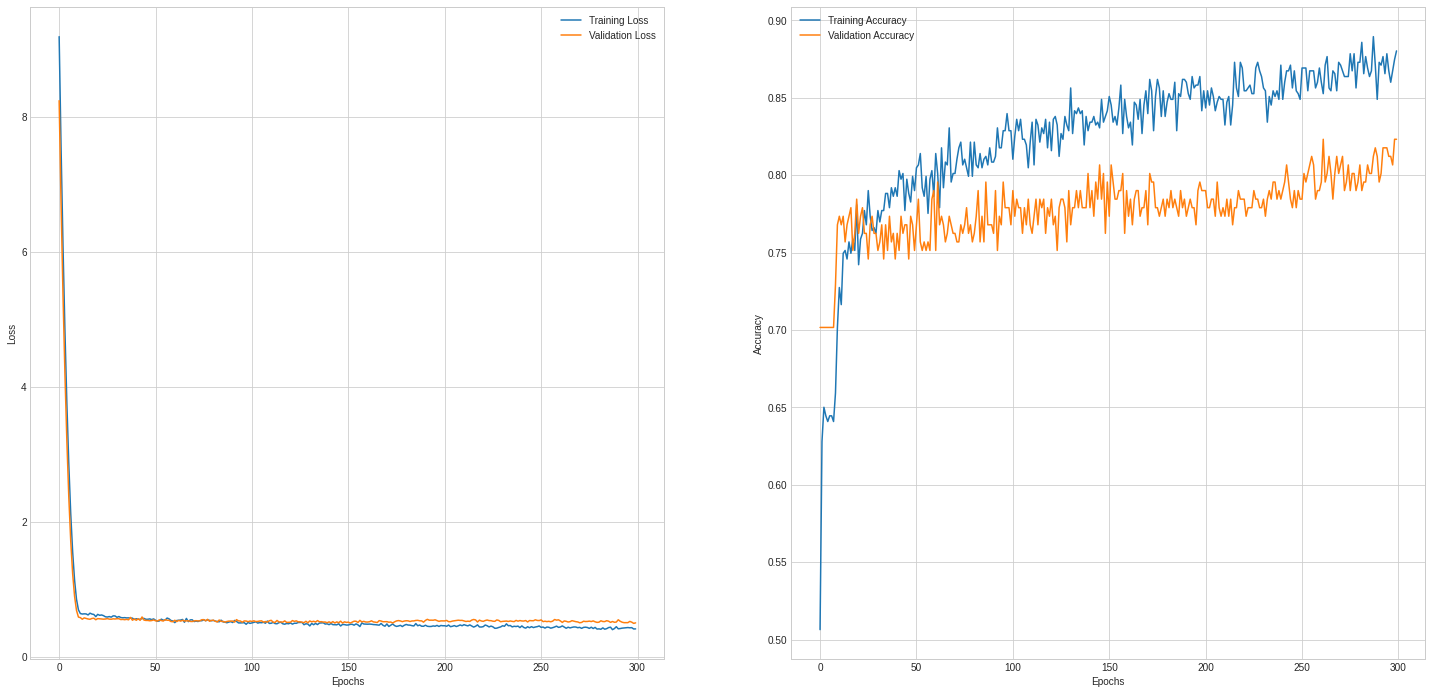

In [122]:
plt.figure(1, figsize = (25, 12))
plt.subplot(1,2,1)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot( history.history["loss"], label = "Training Loss")
plt.plot( history.history["val_loss"], label = "Validation Loss")
plt.grid(True)
plt.legend()

plt.subplot(1,2,2)
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.plot( history.history["accuracy"], label = "Training Accuracy")
plt.plot( history.history["val_accuracy"], label = "Validation Accuracy")
plt.grid(True)
plt.legend()

In [123]:
model_new=keras.models.load_model('diabetes.h5')

In [124]:
model_new.evaluate(xtest,ytest)

6/6 [==============================] - 0s 1ms/step - loss: 0.4950 - accuracy: 0.8232


[0.49504995346069336, 0.8232043981552124]

In [125]:
print(confusion_matrix(ytest, model_new.predict_classes(xtest)))
print('Accuracy of our model is: ', accuracy_score(ytest, model_new.predict_classes(xtest)))

[[108  19]
 [ 13  41]]
Accuracy of our model is:  0.8232044198895028


In [126]:
print(classification_report(ytest, model_new.predict_classes(xtest)))

              precision    recall  f1-score   support

           0       0.89      0.85      0.87       127
           1       0.68      0.76      0.72        54

    accuracy                           0.82       181
   macro avg       0.79      0.80      0.80       181
weighted avg       0.83      0.82      0.83       181

